In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start = '2010-01-01'
end = '2019-12-31'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221169
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [11]:
df=df.reset_index()
df=df.drop(['Date', 'Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


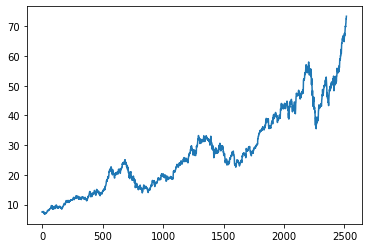

In [12]:
plt.plot(df.Close)

In [13]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

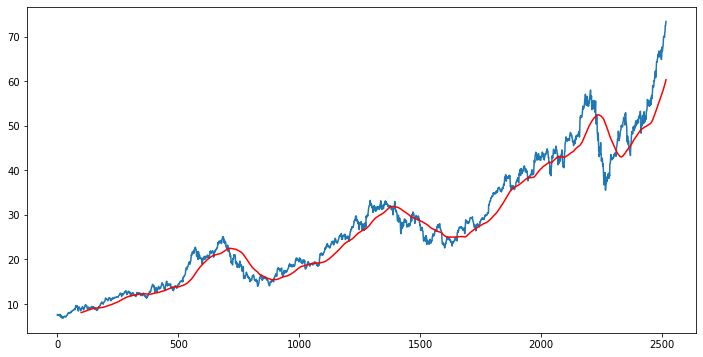

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [17]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

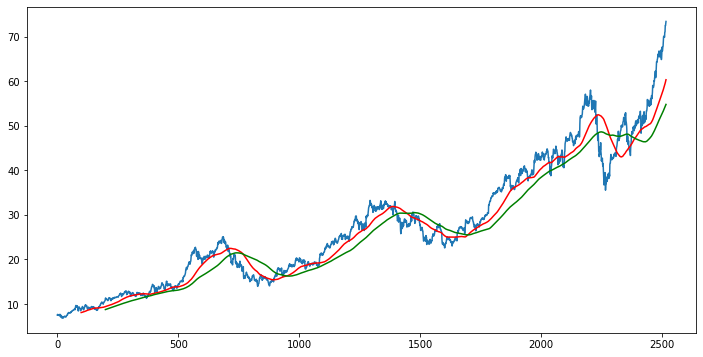

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(2517, 5)

In [25]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):len(df)])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
data_training

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [30]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [32]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train =np.array(x_train)    
y_train =np.array(y_train)

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50 ,activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 ,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 ,activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 ,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 15s 198ms/step - loss: 0.0809
Epoch 2/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0131
Epoch 3/50
52/52 [==============================] - 8s 161ms/step - loss: 0.0106
Epoch 4/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0107
Epoch 5/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0094
Epoch 6/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0084
Epoch 7/50
52/52 [==============================] - 8s 154ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 9s 178ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0074
Epoch 11/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0079
Epoch 12/50
52/52 [==============================] - 9s 178ms/step - loss: 0.0074
Epoch 13/50
52/52 [====

In [38]:
model.save('my_model.h5')

In [39]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\91639\AppData\Local\Temp\ipykernel_32392\674358354.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [40]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [41]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [43]:
input_data.shape

(856, 1)

In [44]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test =np.array(x_test)
y_test =np.array(y_test)
x_test.shape

(756, 100, 1)

In [45]:
y_predicted=model.predict(x_test)

In [46]:
scale_factor=1/scaler.scale_
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

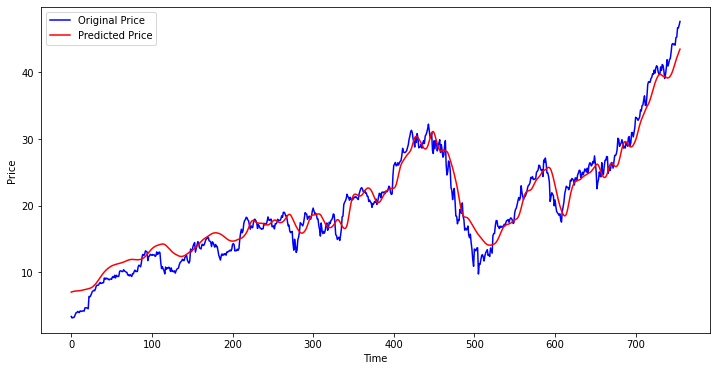

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()